In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter

In [14]:
# read the data

UK_customers_data = pd.read_pickle("../data/UK_customers_rfm.pkl")

# preview the data

UK_customers_data.head(n = 5)

,Frequency,Monetary,Recency
CustomerID,,,
u12346,1,77183.60,325
u12747,11,3763.01,1
u12748,202,28308.44,0
u12749,5,2720.63,3
u1282,4,942.34,2


In [3]:
# distribution of the data

UK_customers_data.describe()

,Frequency,Monetary,Recency
count,3891.000000,3891.000000,3891.000000
mean,4.193010,1625.351723,90.868928
std,7.045063,6744.803129,99.393812
min,1.000000,0.000000,0.000000
25%,1.000000,243.430000,17.000000
50%,2.000000,548.280000,49.000000
75%,5.000000,1368.345000,140.500000
max,202.000000,221190.810000,373.000000


In [4]:
# print the number of customers

print("Total Number of Customers:", (UK_customers_data.shape[0]))

Total Number of Customers: 3891


## Scale the data

In [8]:
# cluster the customer data

# step 1: scale the data

scaler = StandardScaler()

scaler.fit(UK_customers_data)

UK_customers_scaled = scaler.transform(UK_customers_data)
print('New std deviation:', UK_customers_scaled.std())
print('New mean:', round(UK_customers_scaled.mean()))

# normalized data has a mean of 0 and std of 1

New std deviation: 1.0
New mean: 0


## Function identify optimal number of clusters we want to segment the data

In [9]:
# step 2: identify optimal number of clusters we want to segment the data

def optimal_number_clusters(data_scaled):
    """
    Calculates optimal number of clusted based on Elbow Method
    
    parameters: scaled data
    """
    Sum_of_squared_distances = []
    K = range(1, 30) # define the range of clusters we would like to cluster the data into

    for k in K:
        km = KMeans(n_clusters = k)
        km = km.fit(data_scaled)
        Sum_of_squared_distances.append(km.inertia_)

    plt.figure(figsize=(20,6))

    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

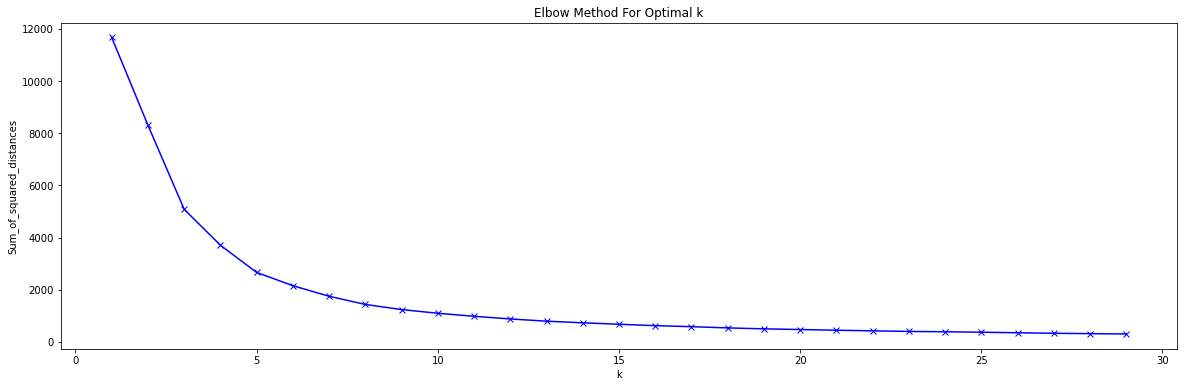

In [13]:
optimal_number_clusters(UK_customers_scaled)

# Question: Where is the elbow forming? 
# identifying clusters: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

In [15]:
# THE MACHINE LEARNING ALGORITHM

n_clusters = 5 # define the number of clusters, where the elbow if formed

kmeans = KMeans(n_clusters = n_clusters, random_state = 10) # initialize the k-means function
kmeans.fit(UK_customers_scaled) # fit to the summary scaled data

KMeans(n_clusters=5, random_state=10)

In [16]:
# predict the clusters for the users

y_kmeans = kmeans.predict(UK_customers_scaled)

In [18]:
y_kmeans

array([2, 3, 2, ..., 0, 3, 0], dtype=int32)

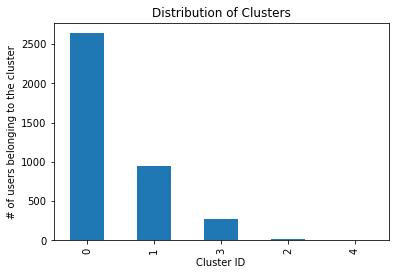

In [20]:
# check the distribution of the clusters

pd.DataFrame(Counter(y_kmeans).most_common()).set_index(0).plot.bar(legend=None)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of users belonging to the cluster');

In [21]:
Counter(y_kmeans)

Counter({2: 19, 3: 276, 0: 2639, 1: 954, 4: 3})

## Check the centroids for each cluster

In [24]:
print("The centroids for the clusters")

pd.DataFrame(kmeans.cluster_centers_, columns = UK_customers_data.columns)


The centroids for the clusters


,Frequency,Monetary,Recency
0,-0.124013,-0.092798,-0.476725
1,-0.375459,-0.186176,1.557819
2,8.527655,6.482827,-0.695627
3,1.851020,0.780624,-0.768810
4,4.184128,27.960322,-0.890870


In [26]:
# join this to our data frame

results = pd.DataFrame(UK_customers_data.copy())
results.insert(3, 'cluster', y_kmeans)
results.head()

# the customers and their assigned clusters

,Frequency,Monetary,Recency,cluster
CustomerID,,,,
u12346,1,77183.60,325,2
u12747,11,3763.01,1,3
u12748,202,28308.44,0,2
u12749,5,2720.63,3,0
u1282,4,942.34,2,0


In [28]:
results['cluster'].value_counts()

0    2639
1     954
3     276
2      19
4       3
Name: cluster, dtype: int64

In [30]:
# evaluate the clusters
# What does the smallest group look like ?

results[results['cluster'] == 4].describe()

,Frequency,Monetary,Recency,cluster
count,3.000000,3.000000,3.000000,3.0
mean,33.666667,190187.986667,2.333333,4.0
std,28.183920,27558.955334,4.041452,0.0
min,2.000000,168472.500000,0.000000,4.0
25%,22.500000,174686.575000,0.000000,4.0
50%,43.000000,180900.650000,0.000000,4.0
75%,49.500000,201045.730000,3.500000,4.0
max,56.000000,221190.810000,7.000000,4.0


In [31]:
# evaluate the clusters
# What does the largest group look like ?

results[results['cluster'] == 0].describe()

# on average spend 1k, and 3 purchases

,Frequency,Monetary,Recency,cluster
count,2639.000000,2639.000000,2639.000000,2639.0
mean,3.319439,999.524715,43.491474,0.0
std,2.335710,1048.535651,35.909084,0.0
min,1.000000,0.000000,0.000000,0.0
25%,1.000000,301.960000,15.000000,0.0
50%,3.000000,655.750000,32.000000,0.0
75%,5.000000,1356.175000,65.000000,0.0
max,11.000000,10534.930000,155.000000,0.0


In [33]:
# evaluate the clusters
# What does other groups look like ?

results[results['cluster'] == 3].describe()

,Frequency,Monetary,Recency,cluster
count,276.000000,276.000000,276.000000,276.0
mean,17.231884,6889.830254,14.463768,3.0
std,7.197262,6356.581079,31.350606,0.0
min,3.000000,856.980000,0.000000,3.0
25%,12.000000,3564.135000,2.000000,3.0
50%,15.000000,4992.885000,7.000000,3.0
75%,20.000000,7499.095000,16.000000,3.0
max,54.000000,44534.300000,371.000000,3.0
